In [1]:
# Author: Brandon Lasher
# Date:  3/17/2022
# 
#  Data Mining Homework 3 - Traffic Violations
#

#Questions to answer
#1. Which colors of vehicles are more likely to get involved in a traffic violation?
#  Black is the most common

#2. Which models of vehicles are more likely to get involved in a traffic violation?
#  Accord's have the highest count of violations. However due the the high number of poorly catigorized vechicle models. 
#  It is possible that any of the Honda or Toyota 4 door sedans may also be close to having the highest counts.  

# Steps and Comments
# 1.Adjust the data and the column names to be a bit more uniform
# 2. Look at the color types and see if the names make sense. 
# 3. Plot the colors vs their number of occurance. 
# 4. Group the colors and violation types to see if there is a type of car that seems to get a specific type of violation
#     more than others. 
#     This showed that it was pretty uniform. To continue this effort, I may want to normalize vs the total number of 
#        occurance of the color, rather than just the counts

# 5. I look at the possible vehicle models.
# 6. I remove the lower occurances, which I am viewing as common spelling error/mistakes and then I remove non-model values. 
#      Such as tk, 4s, van, 4dr, etc.  As these are not models, but actually a different classifier of a car type.
# 7. I plot the type vs occurance of each type remaining. I found that accords and civics are the top types. 
# 8. I explored a bit more and looked at in detail a bit more at the top occuring value I dropped '4s'. I found
#      that the most common make was toyota when this value was entered. And it is large enough count that it might sway 
#      the final tallys. And this was just looking into one bad value. 
#
#  I did also try to see if I could apply a spelling correction library to the models to see if that might clean things up for the 
# lower count occurances. I was not successful in the implementation. 

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read in spreadsheet
df = pd.read_csv('Traffic_Violations.csv', low_memory=False)


In [3]:
for col in df.columns:
    print(col)

Date Of Stop
Time Of Stop
Agency
SubAgency
Description
Location
Latitude
Longitude
Accident
Belts
Personal Injury
Property Damage
Fatal
Commercial License
HAZMAT
Commercial Vehicle
Alcohol
Work Zone
State
VehicleType
Year
Make
Model
Color
Violation Type
Charge
Article
Contributed To Accident
Race
Gender
Driver City
Driver State
DL State
Arrest Type
Geolocation


In [4]:
#modify column names and string data just to make uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
for col in df.columns:
    print(col)


string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

date_of_stop
time_of_stop
agency
subagency
description
location
latitude
longitude
accident
belts
personal_injury
property_damage
fatal
commercial_license
hazmat
commercial_vehicle
alcohol
work_zone
state
vehicletype
year
make
model
color
violation_type
charge
article
contributed_to_accident
race
gender
driver_city
driver_state
dl_state
arrest_type
geolocation


In [5]:
#Information we need are color, make, model (is make a part of model?), if violation occured
cols = ['color', 'make', 'model', 'violation_type']
sub_df = df[cols]


# Look at the color distribution
## 1. Which colors of vehicles are more likely to get involved in a traffic violation?

In [6]:
#check the unique values for colors
print( pd.unique(sub_df.color) )
print( "Number of Null:", sub_df['color'].isna().sum() )
sub_df.dropna()

['black' 'green' 'silver' 'white' 'gray' 'red' 'gold' 'blue' nan
 'blue,_dark' 'tan' 'cream' 'purple' 'beige' 'blue,_light' 'maroon'
 'green,_dk' 'green,_lgt' 'orange' 'brown' 'bronze' 'yellow' 'copper'
 'multicolor' 'camouflage' 'pink' 'chrome']
Number of Null: 16127


,color,make,model,violation_type
0,black,ford,4s,citation
1,green,toyota,corolla,citation
2,silver,honda,accord,citation
3,white,dodg,dakota,citation
4,white,mini_cooper,2s,citation
...,...,...,...,...
1292394,blue,toyt,matrix,esero
1292395,green,hond,civic,esero
1292396,blue,hond,crv,esero
1292397,yellow,chev,cavalier,esero


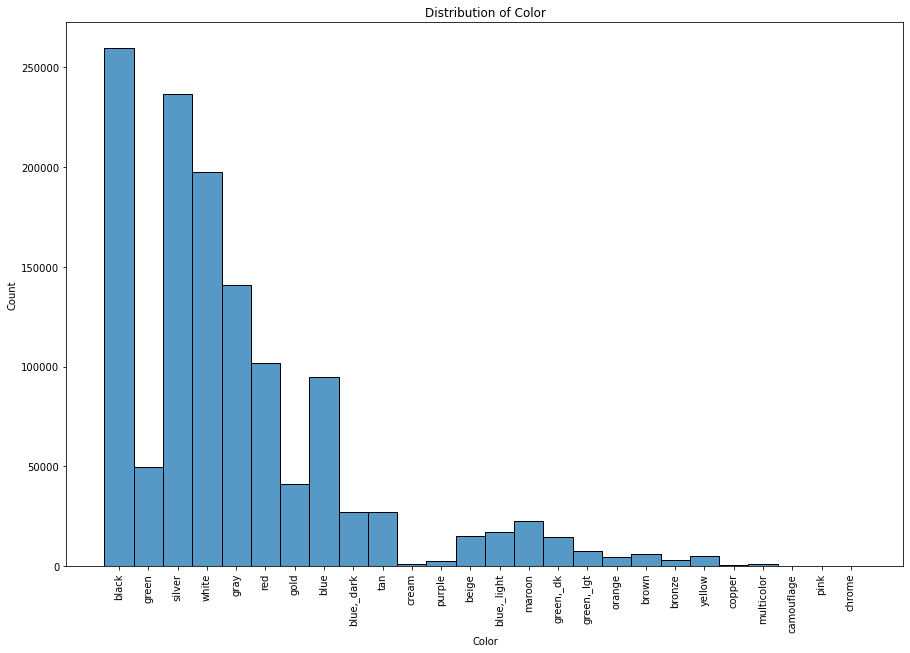

In [7]:
#plot the color vs occurance
plt.figure(figsize=(15, 10))

p = sns.histplot(sub_df.color)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Color')
plt.title('Distribution of Color')

plt.show()

## See if there a pattern for color and violation type

In [8]:
print( pd.unique(sub_df.violation_type) )
print( "Number of Null:", sub_df['violation_type'].isna().sum() )



['citation' 'warning' 'esero' 'sero']
Number of Null: 0


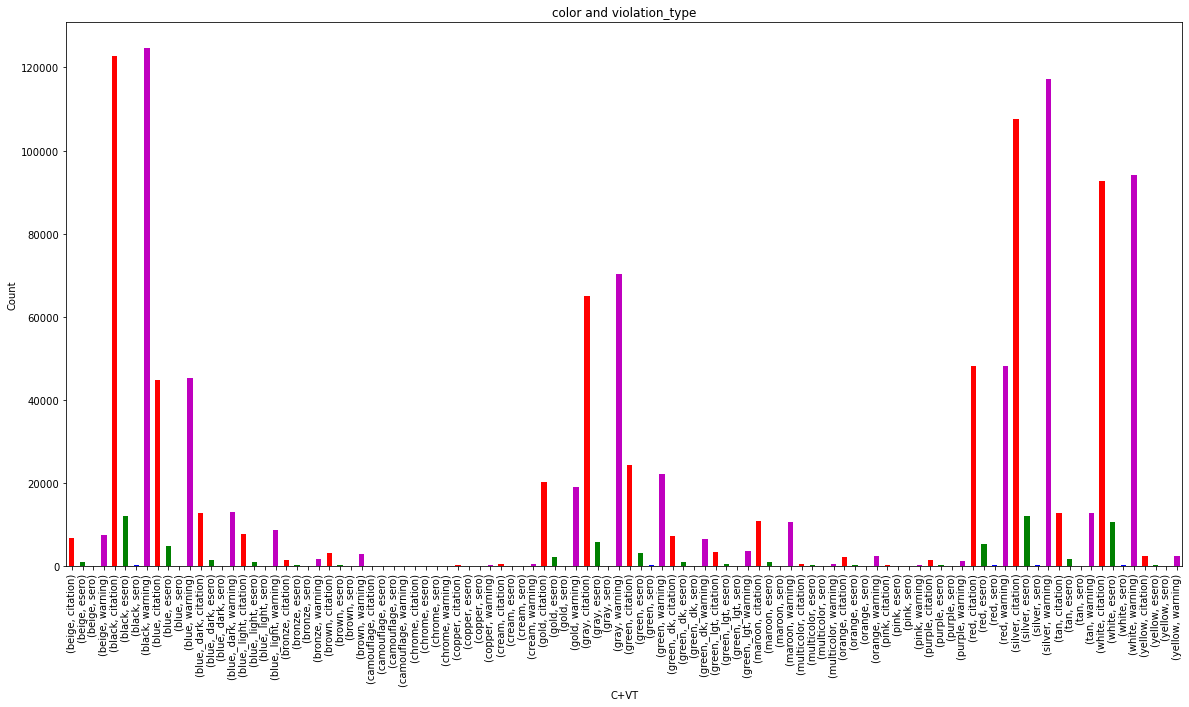

In [9]:
#remove na from tables
#df = df.dropna()

"""
colors = ['black', 'green', 'silver', 'white', 'gray', 'red', 'gold', 'blue',
 'blue,_dark', 'tan', 'cream', 'purple', 'beige', 'blue,_light', 'maroon'
 'green,_dk', 'green,_lgt', 'orange', 'brown', 'bronze', 'yellow', 'copper',
 'multicolor', 'camouflage', 'pink', 'chrome']

color_map = {}
for e,c in enumerate( colors ):
    color_map[c] = e   
#print( color_map )

df["color_scale"] = df["color"].replace(color_map)

vio_map ={}
vio_type = ['citation', 'warning', 'esero', 'sero']
for e,v in enumerate( vio_type ):
    vio_map[v] = e

df["vio_scale"] = df["violation_type"].replace(vio_map)
"""
#It is worth noting that all esero violations will be dropped if we drop all na
groupings =  df.groupby(["color","violation_type"])["color"].count().unstack(fill_value=0).stack()
groupings.plot(kind='bar', title='color and violation_type', ylabel='Count', xlabel='C+VT', figsize=(20, 10), color=['r','g','b','m'])


plt.show()



# Look at the model distribution

## 2. Which models of vehicles are more likely to get involved in a traffic violation?

In [10]:
#2. Which models of vehicles are more likely to get involved in a traffic violation?

# This one needs some clean up
mod_unique = pd.unique(sub_df.model)
print( mod_unique, len( mod_unique ) )
print( "Number of NUll:", sub_df['model'].isna().sum() )

['4s' 'corolla' 'accord' ... '35m' 'ciicic' 'charakee'] 17561
Number of NUll: 187


In [11]:
#Check the value counts of each occurance.
sub_df['model'].value_counts()

#This shows there are many many many invalid models entered.
# There are a few ways we can deal with this.
# 1. We can compile a list of know good make / models and only use entries which match those
# 2. We can slowly filter out the low counts as "bad" or invalid. Then look at what remain 
#     and then filter out specific non-descipt values
# 3. We can do some combination of both and try to combine entries where possible.  (ie.  4s_prus is a prius )

4s           144337
tk            84159
accord        47388
civic         44291
camry         43232
              ...  
suv_350           1
900_se            1
3.2_cl_4d         1
4s_prus           1
charakee          1
Name: model, Length: 17560, dtype: int64

In [12]:

#Remove ambiguous model names. 
# 
bad_values = ['4s', '2s', 'tk', '4d', '4dr','none', 'sw', 'vn', 'van', 'truck', 'tl', 'su', 'suv', '2d', '2dr', '3', '6' ]
model_df = sub_df[~sub_df['model'].isin( bad_values )]

# Get the count of each value
value_counts = model_df['model'].value_counts()

# Select the values where the count is greater than 2000
# This will remove alot of the small uncommon spelling errors.
# 
to_remove = value_counts[value_counts <= 2000].index

# Keep rows where the city column is not in to_remove
model_df = model_df[~model_df.model.isin(to_remove)]

#print a summary and some information about the dataset
print( model_df['model'].value_counts() ) 
print( "Mean: " , model_df['model'].value_counts().mean() ) 
print( "Std: " , model_df['model'].value_counts().std() ) 



accord      47388
civic       44291
camry       43232
corolla     38206
altima      24609
            ...  
escalade     2052
equinox      2048
f250         2014
lancer       2003
cobalt       2002
Name: model, Length: 81, dtype: int64
Mean:  6647.419753086419
Std:  9104.875840537581


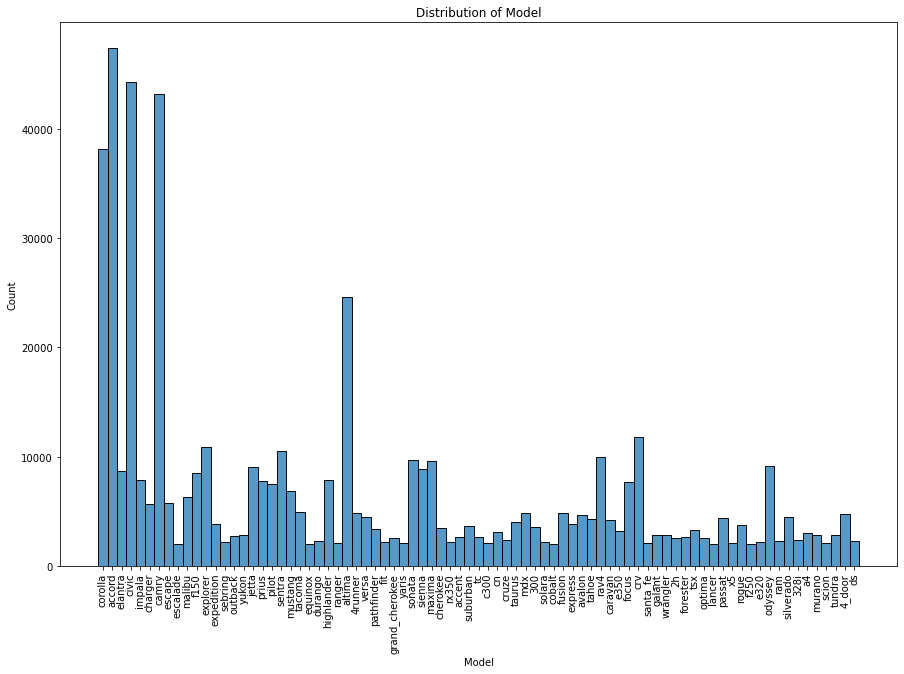

In [13]:

plt.figure(figsize=(15, 10))

sns.histplot(model_df.model)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Model')
plt.title('Distribution of Model')

plt.show()

In [14]:
#Lets look at 4s, to see if there is a "make" that is more common and how that goes with the model counts

model_df = sub_df[ sub_df.model == '4s' ]
print( model_df['make'].value_counts() ) 


toyt         22024
hond         16019
niss          9885
bmw           5684
hyun          5487
             ...  
infiniiti        1
tiyita           1
vork             1
buicj            1
bucik            1
Name: make, Length: 538, dtype: int64
